In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
def r_indices(shape):
    indices = []
    offset = shape[1]//2
    for i in range(shape[0]//2):
        idx = np.array( [ x for x in range(i+1) ] ) +(offset-i)
        indices.append(idx)
    print(indices)
        
def cubo(shape=(3,3)): 
    return np.ones(shape)

def c_indices(shape=3, val=1):
    valores = np.array( [(x*2)+1 for x in range( shape ) if (x*2)+1<shape ] )
#     print(valores)
    if shape%2 == 0:
        valores = (valores[1:])-1
    if val not in valores:
        idx = np.abs(valores-val).argmin()
        val = valores[ idx ]
    offset = (shape-val)//2
#     print(val, offset)
    indices = np.array( range( val ) )+offset
    return indices
    
    
# def cruz(shape=(3, 3), ancho=1):
def cruz(valores, ancho=1):
#     alto = ancho
#     elem = np.zeros(shape)
        ind_i = c_indices(valores.shape[0], ancho)
        ind_j = c_indices(valores.shape[1], ancho)
        
        elem_finales = []
        elem_finales.extend( valores[ind_i,:].flatten())
        elem_finales.extend(valores[:,ind_j].flatten())
        return np.unique(np.array(elem_finales))
#     ind_i = c_indices(valores.shape[0], ancho)
#     ind_j = c_indices(valores.shape[1], ancho)

#     elem[ind_i,:] = 1
#     elem[:,ind_j] = 1

#     return elem

def rombo(shape=(3, 3)):
    elem = np.zeros(shape)
    j = shape[0]//2
    print(j)
    for i in range(shape[0]//2):
        elem[i, j-i:j+i] = 1
        elem[-i, j-i:j+i] = 1
    return elem

def barra(shape=(3, 3), ancho=1, orientation="h"):
    elem = np.zeros(shape)
    if orientation=="h":
        i = shape[0]//2
        
        elem[i:(i+ancho), :] = 1
        return elem
    i = shape[1]//2
    elem[:, i:i+ancho] = 1
    return elem
        

In [31]:
rombo((3,3)) ROMBO NO ANDA!

SyntaxError: invalid syntax (<ipython-input-31-a33d0bb71128>, line 1)

In [6]:
import itertools

def dilatar(v, elem):
    f = v.flatten()
    f[int(len(f)/2)] = 0
    return max(f)
    
def erosionar(v):
    f = v.flatten()
    f[int(len(f)/2)] = 255
    return min(f)

def median(v):
    f = v.flatten()
    f.sort()
    out = f[int(len(f)/2)]
    return out

# def filtro(im, r=3, operar=median):
# def filtro(im, r=3, operar=median):
#     temp = get_temp(im, r)
#     final = np.zeros_like(im)
#     for i, j in itertools.product(range(im.shape[0]), range(im.shape[1])):
#         vecinos = temp[i: i+(2*r), j+1: j+(2*r)]
#         final[i, j] = operar(vecinos)
#     return final

def apertura(im, r=3, er=1, dil=1):
    v = im.copy()
    for i in range(max(1, er)):
        v = filtro(v, r, erosionar)
    for i in range(dil):
        v = filtro(v, r, dilatar)
    return v

def cierre(im, r=3, dil=1, er=1):
    v = im.copy()
    for i in range(max(1, dil)):
        v = filtro(v, r, dilatar)
    for i in range(er):
        v = filtro(v, r, erosionar)
    return v

In [7]:
def filtro(img, operar=median, elem=cubo, ancho=1):
    # elem debe ser dos arreglos con los índices que forman el elemento estructurante
    new_shape = img.shape[0]-ancho, img.shape[1]-ancho
    new_img = np.zeros(new_shape)
    offset = ancho // 2
    for i, j in itertools.product(range(new_shape[0]), range(new_shape[1])):
        ventana = img[i+1: i+1+(2*ancho), j+1: j+1+(2*ancho)]
        vecinos = elem(ventana)
        new_img[i, j] = operar(ventana)
    return new_img

In [17]:
img = np.random.rand(20, 20)
img[img < .5] = 0
img[img > .5] = 1

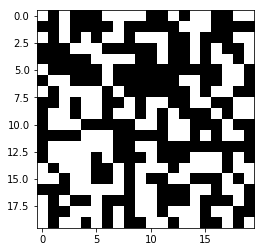

In [18]:
new_img = filtro

plt.figure()
plt.imshow(img, cmap=plt.cm.gray)
plt.show()